# Machine Learning on Mushroom Toxicity

### Description of Dataset

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class).

### Variables

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

### Objectives

Identify what features are most commonly associated with poisonous and non-poisonous mushrooms.




## Step 1: Data Cleaning & Preprocessing

In [23]:
# Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
# Import data
data = pd.read_csv('./Resources/secondary_data_shuffled.csv', sep=';')

In [25]:
# Check the data
data.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,12.79,x,e,n,t,p,NaN,e,9.60,...,c,NaN,y,NaN,NaN,f,f,NaN,d,u
61065,p,2.42,x,d,w,f,a,d,p,3.52,...,NaN,h,w,NaN,NaN,f,f,NaN,g,u
61066,e,12.33,s,NaN,u,f,s,c,u,7.71,...,NaN,NaN,u,NaN,NaN,f,f,NaN,d,a
61067,p,3.85,s,w,u,f,a,c,u,5.32,...,NaN,s,u,NaN,NaN,f,f,NaN,l,a
61068,p,1.98,x,i,k,f,a,NaN,w,3.16,...,NaN,NaN,w,NaN,NaN,f,f,p,g,a


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,84,6,2,11,0,1,3,10,394,...,5,6,12,1,6,0,1,7,0,0
1,0,990,2,1,0,0,7,0,0,358,...,5,8,11,1,6,1,1,7,0,0
2,1,50,6,2,7,0,0,3,7,349,...,5,2,4,1,6,0,1,7,0,2
3,1,385,6,11,7,0,6,3,10,345,...,5,8,11,1,6,0,1,7,0,0
4,0,266,2,7,10,0,1,1,10,157,...,5,8,11,1,6,0,1,7,4,0


In [43]:
data = data.dropna(axis=1)

In [44]:
X = data.drop(['class'], axis=1)
y = data['class']

In [45]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,84,6,2,11,0,1,3,10,394,119,5,6,12,1,6,0,1,7,0,0
1,990,2,1,0,0,7,0,0,358,1890,5,8,11,1,6,1,1,7,0,0
2,50,6,2,7,0,0,3,7,349,61,5,2,4,1,6,0,1,7,0,2
3,385,6,11,7,0,6,3,10,345,598,5,8,11,1,6,0,1,7,0,0
4,266,2,7,10,0,1,1,10,157,464,5,8,11,1,6,0,1,7,4,0


In [46]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int32

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.24911477,  0.92005277, -1.28489638, ...,  0.30780241,
        -0.49021951, -0.95762422],
       [ 0.8740304 , -0.95057697, -1.55506349, ...,  0.30780241,
        -0.49021951, -0.95762422],
       [-1.3287913 ,  0.92005277, -1.28489638, ...,  0.30780241,
        -0.49021951,  0.85737697],
       ...,
       [ 1.34505929,  0.45239533,  1.14660766, ...,  0.30780241,
        -0.49021951, -0.95762422],
       [-0.64216709,  0.45239533,  0.60627343, ...,  0.30780241,
         1.86970498, -0.95762422],
       [-1.080388  ,  0.92005277, -0.74456215, ..., -2.42882147,
         0.29642198, -0.95762422]])

In [48]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.07755420e+00,  6.87063197e-02, -8.51451460e-01, ...,
         3.96362140e-01,  2.10460552e-01, -1.24435623e-01],
       [ 1.09433018e-01,  1.85978126e-01,  6.67673368e-01, ...,
        -5.93170648e-01,  1.27527400e+00,  1.44819317e-01],
       [-2.13295912e+00,  4.95421638e-01,  1.67498762e+00, ...,
         3.60138137e-01, -1.25113782e-03, -2.88266404e-01],
       ...,
       [ 9.16338500e-01, -1.66036946e+00, -1.48242099e+00, ...,
         1.05615405e-01, -4.06466338e-02,  2.89546864e-01],
       [-1.48081512e+00,  1.82201015e-01, -1.67410178e+00, ...,
         2.05438798e-01, -3.65171804e-01,  5.82659276e-02],
       [-1.35232638e+00,  6.26020069e-01,  8.73377118e-01, ...,
        -3.36367455e-01,  4.39015090e-01,  1.85553980e-01]])

In [49]:
#covariance
covariance=pca.get_covariance()

In [50]:
explained_variance=pca.explained_variance_
explained_variance

array([2.92056159, 2.06203934, 1.57117255, 1.46558065, 1.24706573,
       1.18130417, 1.03257847, 1.01137922, 0.96884251, 0.94222571,
       0.86782622, 0.85301735, 0.76021101, 0.67312384, 0.60039848,
       0.55090473, 0.44858004, 0.42889627, 0.2517684 , 0.16285121])

In [53]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(20), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [29]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Original shape: (45801, 11)
Transformed Shape of PCA data: (45801, 11)


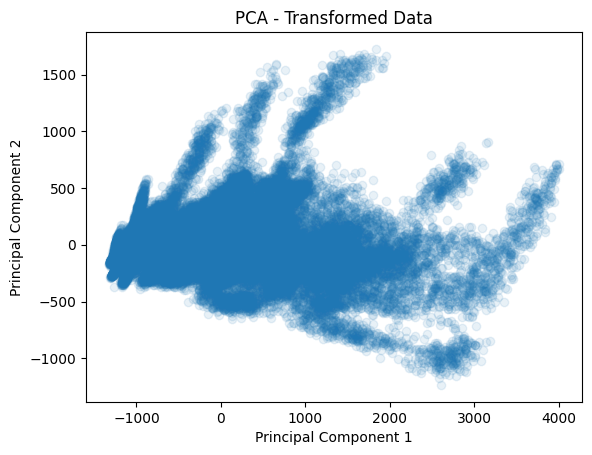

In [30]:
print("Original shape:", X_train.shape)
print("Transformed Shape of PCA data:", X_train_pca.shape)

# Plot the transformed data using a scatter plot(lower alpha allows for better visualization when there are overlapping points.)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],alpha=0.1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Transformed Data")
plt.show()

In [31]:
pca.explained_variance_ratio_

array([8.76871393e-01, 8.07420004e-02, 4.23526053e-02, 1.25624184e-05,
       7.85530189e-06, 6.77152679e-06, 4.00022922e-06, 1.43626681e-06,
       1.11063794e-06, 1.45397509e-07, 1.19768584e-07])

In [32]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming you already have the dataset X

# Create an instance of PCA with n_components=2
pca = PCA(n_components=2)

# Fit and transform the dataset X using PCA
X_pca = pca.fit_transform(X)

# Get the values of PCA1 and PCA2
PCA1 = X_pca[:, 0]
PCA2 = X_pca[:, 1]

# Print the values of PCA1 and PCA2
print("PCA1 values:", PCA1)
print("PCA2 values:", PCA2)

PCA1 values: [-1156.47512985   793.35075211 -1229.6216956  ...  1151.86392091
  -702.24841279 -1098.40672651]
PCA2 values: [ -15.60046301 -257.09865512  -49.16423668 ...    1.29686036  -13.07527289
 -170.81720156]


The first principal component (PC1) explains approximately 87.69% of the variance in the data.
The second principal component (PC2) explains approximately 8.07% of the variance in the data.
Together, these two principal components explain approximately 95.76% of the total variance in the original data.

TypeError: unhashable type: 'list'

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [22]:
print("TRAINING RESULTS:\n")

# Calculate accuracy score
accuracy = accuracy_score(y_train, lr.predict(X_train_pca))
print(f"Accuracy Score: {accuracy:.4f}\n")

# Generate classification report
classification_report_result = classification_report(y_train, lr.predict(X_train_pca))
print(f"Classification Report:\n{classification_report_result}\n")

# Generate confusion matrix
confusion_matrix_result = confusion_matrix(y_train, lr.predict(X_train_pca))
print(f"Confusion Matrix:\n{confusion_matrix_result}\n")

# Perform cross-validation and calculate average accuracy
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
average_accuracy = res.mean()
print(f"Average Accuracy:\t{average_accuracy:.4f}\n")

# Calculate standard deviation
standard_deviation = res.std()
print(f"Standard Deviation:\t{standard_deviation:.4f}")

TRAINING RESULTS:

Accuracy Score: 0.5968

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43     20416
           1       0.60      0.80      0.69     25385

    accuracy                           0.60     45801
   macro avg       0.59      0.57      0.56     45801
weighted avg       0.59      0.60      0.57     45801


Confusion Matrix:
[[ 7012 13404]
 [ 5062 20323]]

Average Accuracy:	0.5966

Standard Deviation:	0.0080


## Step 3: Predictive Analyses

### Principal Components Analysis

In [17]:
# Import the PCA module
from sklearn.decomposition import PCA

### Random Forest

In [18]:
# Import the Random Forest module
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [19]:
# Import the Logistic Regression modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score